# Étude de la complémentarité Conso-Éolien-PV

Voici une question proche, qui m'a déjà interpellée, et pour laquelle je n'ai pas encore cherché de réponse : il y a une corrélation positive entre la production éolienne et la consommation elec française (toutes deux plus fortes en hiver).
Cependant, comme tu l'as remarqué, en cas d'anticyclone hivernal, on a une chute de la prod éolienne. C'est le cette semaine, mais aussi lors des vagues de grand froid. Ainsi, localement, l'éolien et la consommation seraient corrélées négativement.
On arrive alors à la question : lors de ces anticyclones, y a-t-il toujours une augmentation de la production solaire (qui compenserait la chute de l'éolien). Autrement dit, y a-t-il une corrélation négative en hiver entre éolien et solaire ?
(Il faut préciser "en hiver", car sur l'année entière, la corrélation négative est évidente)

Recherche rapide de la production de ces derniers jours, avec 3 cas de figure : ce mercredi vent - et PV +. On a aussi l'inverse (tempête et nuages). Et enfin le cas plus embêtant : peu d'éolien et solaire assez moyen. Il faudrait quantifier tout ça.

PH, 28 fév 2019

![Screenshot RTE eCO2mix](Screenshot_RTE_eCO2mix.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('parc-national-annuel-prod-eolien-solaire.csv', sep=';', index_col=0)
df.index.name = None
df.rename(columns={'Parc installé éolien (MW)':'P_wind', 'Parc installé solaire (MW)': 'P_sol'}, inplace=True)
df.sort_index(inplace=True)
df.head(3)


,P_wind,P_sol
2001,94.0,0.0
2002,129.0,0.0
2003,219.0,0.0


In [5]:
# TODO: convert index to dates (2001 into date 2001-12-31). Parsing not good because it generates 2001-01-01
df.index = pd.date_range(str(df.index[0]),periods=len(df), freq='Y')
df.tail(3)

,P_wind,P_sol
2016-12-31,11761.0,6773.0
2017-12-31,13550.0,7654.0
2018-12-31,15108.0,8527.0


In [6]:
df.index

DatetimeIndex(['2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

NB, plot anchoring is wrong

/home/pierre/Programmes/bin/miniconda3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/pierre/Programmes/bin/miniconda3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


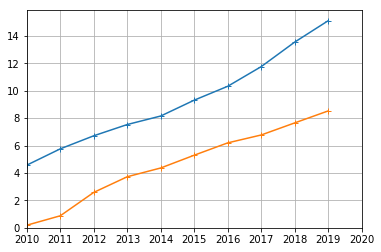

In [7]:
plt.plot(df.index, df/1e3, '-+')

plt.grid()
plt.xlim('2010','2020')
plt.ylim(ymin=0);

In [18]:
df = pd.read_csv('eCO2mix_RTE_Annuel-Definitif_2015.xls.xz', compression='xz', encoding='windows-1252',
                 sep='\t', skipfooter=2,engine='python',
                 index_col=False, parse_dates={'date':[2,3]})

In [19]:
df.head()

,date,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,2015-01-01 00:00:00,France,Données définitives,74494.0,72900,73700,269.0,2487.0,3476.0,57982.0,...,3.0,2056.0,1350.0,66.0,4810.0,3093.0,1418.0,560.0,181.0,197.0
1,2015-01-01 00:15:00,France,Données définitives,NaN,72250,73050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 00:30:00,France,Données définitives,73481.0,71600,72400,319.0,2087.0,2691.0,57856.0,...,9.0,1926.0,670.0,86.0,4616.0,3561.0,1487.0,507.0,180.0,210.0
3,2015-01-01 00:45:00,France,Données définitives,NaN,70750,71500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 01:00:00,France,Données définitives,71506.0,69900,70600,320.0,1716.0,2436.0,57787.0,...,9.0,1919.0,422.0,86.0,4492.0,2805.0,1182.0,508.0,174.0,212.0


keep only data every 30 minutes

In [20]:
df = df.iloc[::2,:]
df.head()

,date,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,2015-01-01 00:00:00,France,Données définitives,74494.0,72900,73700,269.0,2487.0,3476.0,57982.0,...,3.0,2056.0,1350.0,66.0,4810.0,3093.0,1418.0,560.0,181.0,197.0
2,2015-01-01 00:30:00,France,Données définitives,73481.0,71600,72400,319.0,2087.0,2691.0,57856.0,...,9.0,1926.0,670.0,86.0,4616.0,3561.0,1487.0,507.0,180.0,210.0
4,2015-01-01 01:00:00,France,Données définitives,71506.0,69900,70600,320.0,1716.0,2436.0,57787.0,...,9.0,1919.0,422.0,86.0,4492.0,2805.0,1182.0,508.0,174.0,212.0
6,2015-01-01 01:30:00,France,Données définitives,71505.0,70600,71300,320.0,1589.0,2440.0,58156.0,...,10.0,1924.0,420.0,86.0,4369.0,2623.0,1301.0,512.0,180.0,212.0
8,2015-01-01 02:00:00,France,Données définitives,71134.0,70500,71100,320.0,1490.0,2441.0,57974.0,...,9.0,1927.0,419.0,86.0,4318.0,2670.0,1115.0,509.0,182.0,211.0


In [22]:
df.set_index('date', verify_integrity=True, inplace=True)
df.head()

,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,France,Données définitives,74494.0,72900,73700,269.0,2487.0,3476.0,57982.0,1268.0,...,3.0,2056.0,1350.0,66.0,4810.0,3093.0,1418.0,560.0,181.0,197.0
2015-01-01 00:30:00,France,Données définitives,73481.0,71600,72400,319.0,2087.0,2691.0,57856.0,1343.0,...,9.0,1926.0,670.0,86.0,4616.0,3561.0,1487.0,507.0,180.0,210.0
2015-01-01 01:00:00,France,Données définitives,71506.0,69900,70600,320.0,1716.0,2436.0,57787.0,1356.0,...,9.0,1919.0,422.0,86.0,4492.0,2805.0,1182.0,508.0,174.0,212.0
2015-01-01 01:30:00,France,Données définitives,71505.0,70600,71300,320.0,1589.0,2440.0,58156.0,1412.0,...,10.0,1924.0,420.0,86.0,4369.0,2623.0,1301.0,512.0,180.0,212.0
2015-01-01 02:00:00,France,Données définitives,71134.0,70500,71100,320.0,1490.0,2441.0,57974.0,1447.0,...,9.0,1927.0,419.0,86.0,4318.0,2670.0,1115.0,509.0,182.0,211.0


In [42]:
df.index.name = ''

In [43]:
df.Eolien


2015-01-01 00:00:00    1268.0
2015-01-01 00:30:00    1343.0
2015-01-01 01:00:00    1356.0
2015-01-01 01:30:00    1412.0
2015-01-01 02:00:00    1447.0
2015-01-01 02:30:00    1507.0
2015-01-01 03:00:00    1533.0
2015-01-01 03:30:00    1570.0
2015-01-01 04:00:00    1569.0
2015-01-01 04:30:00    1616.0
2015-01-01 05:00:00    1610.0
2015-01-01 05:30:00    1462.0
2015-01-01 06:00:00    1396.0
2015-01-01 06:30:00    1300.0
2015-01-01 07:00:00    1370.0
2015-01-01 07:30:00    1531.0
2015-01-01 08:00:00    1656.0
2015-01-01 08:30:00    1806.0
2015-01-01 09:00:00    1932.0
2015-01-01 09:30:00    1983.0
2015-01-01 10:00:00    1998.0
2015-01-01 10:30:00    2030.0
2015-01-01 11:00:00    1965.0
2015-01-01 11:30:00    1883.0
2015-01-01 12:00:00    1820.0
2015-01-01 12:30:00    1788.0
2015-01-01 13:00:00    1745.0
2015-01-01 13:30:00    1754.0
2015-01-01 14:00:00    1756.0
2015-01-01 14:30:00    1695.0
                        ...  
2015-12-31 09:00:00    4075.0
2015-12-31 09:30:00    3955.0
2015-12-3

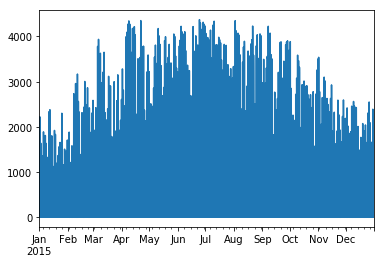

In [44]:
df.Solaire.plot()

In [45]:
df1M = df.resample('1M').mean()

In [46]:
df1M /= 1e3 # MW -> GW

/home/pierre/Programmes/bin/miniconda3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


Text(0, 0.5, 'GW')

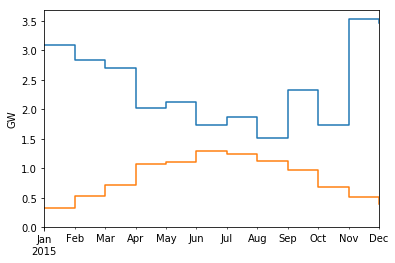

In [47]:
df1M.Eolien.plot(drawstyle='steps-post')
df1M.Solaire.plot(drawstyle='steps-post')
plt.ylim(ymin=0)
plt.ylabel('GW')

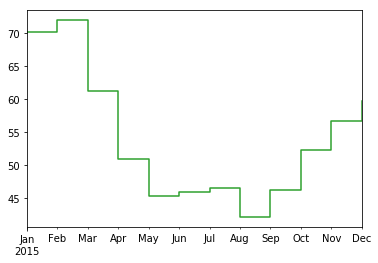

In [51]:
df1M.Consommation.plot(drawstyle='steps-post',color='C2')

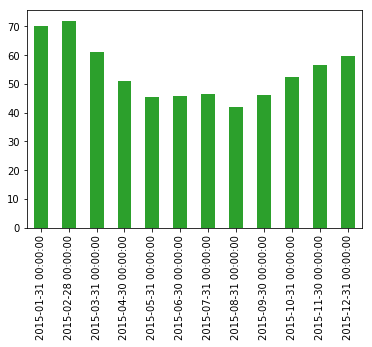

In [53]:
df1M.Consommation.plot.bar(color='C2')

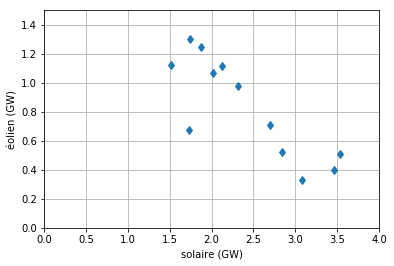

In [48]:
plt.plot(df1M.Eolien, df1M.Solaire, 'd')
ax = plt.gca()
ax.set(
    xlim=(0,4),
    xlabel='solaire (GW)',
    ylim=(0,1.5),
    ylabel='éolien (GW)',
)
ax.grid();

In [ ]:
²